In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("SummaryofWeather.csv", low_memory=False)

In [3]:
df.head()

,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,...,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE
0,10001,1942-7-1,1.016,NaN,25.555556,22.222222,23.888889,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10001,1942-7-2,0,NaN,28.888889,21.666667,25.555556,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10001,1942-7-3,2.54,NaN,26.111111,22.222222,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10001,1942-7-4,2.54,NaN,26.666667,22.222222,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10001,1942-7-5,0,NaN,26.666667,21.666667,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.tail()

,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,...,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE
119035,82506,1945-12-27,0,NaN,28.333333,18.333333,23.333333,0,NaN,45,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
119036,82506,1945-12-28,9.906,NaN,29.444444,18.333333,23.888889,0,1,45,...,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN
119037,82506,1945-12-29,0,NaN,28.333333,18.333333,23.333333,0,1,45,...,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN
119038,82506,1945-12-30,0,NaN,28.333333,18.333333,23.333333,0,NaN,45,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
119039,82506,1945-12-31,0,NaN,29.444444,17.222222,23.333333,0,NaN,45,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.columns

Index(['STA', 'Date', 'Precip', 'WindGustSpd', 'MaxTemp', 'MinTemp',
       'MeanTemp', 'Snowfall', 'PoorWeather', 'YR', 'MO', 'DA', 'PRCP', 'DR',
       'SPD', 'MAX', 'MIN', 'MEA', 'SNF', 'SND', 'FT', 'FB', 'FTI', 'ITH',
       'PGT', 'TSHDSBRSGF', 'SD3', 'RHX', 'RHN', 'RVG', 'WTE'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119040 entries, 0 to 119039
Data columns (total 31 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   STA          119040 non-null  int64  
 1   Date         119040 non-null  object 
 2   Precip       119040 non-null  object 
 3   WindGustSpd  532 non-null     float64
 4   MaxTemp      119040 non-null  float64
 5   MinTemp      119040 non-null  float64
 6   MeanTemp     119040 non-null  float64
 7   Snowfall     117877 non-null  object 
 8   PoorWeather  34237 non-null   object 
 9   YR           119040 non-null  int64  
 10  MO           119040 non-null  int64  
 11  DA           119040 non-null  int64  
 12  PRCP         117108 non-null  object 
 13  DR           533 non-null     float64
 14  SPD          532 non-null     float64
 15  MAX          118566 non-null  float64
 16  MIN          118572 non-null  float64
 17  MEA          118542 non-null  float64
 18  SNF          117877 non-

In [7]:
df.isnull().sum()

STA                 0
Date                0
Precip              0
WindGustSpd    118508
MaxTemp             0
MinTemp             0
MeanTemp            0
Snowfall         1163
PoorWeather     84803
YR                  0
MO                  0
DA                  0
PRCP             1932
DR             118507
SPD            118508
MAX               474
MIN               468
MEA               498
SNF              1163
SND            113477
FT             119040
FB             119040
FTI            119040
ITH            119040
PGT            118515
TSHDSBRSGF      84803
SD3            119040
RHX            119040
RHN            119040
RVG            119040
WTE            119040
dtype: int64

In [8]:
df.shape

(119040, 31)

In [9]:
# We create function for delet a null columns

def drop_null_columns(df,threshold=0.70):  
    for column in df.columns:
        if df[column].isnull().sum() > (len(df) * threshold):
            df.drop(column,axis=1,inplace=True)

In [10]:
drop_null_columns(df,threshold=0.7)

In [11]:
df.head()

,STA,Date,Precip,MaxTemp,MinTemp,MeanTemp,Snowfall,YR,MO,DA,PRCP,MAX,MIN,MEA,SNF
0,10001,1942-7-1,1.016,25.555556,22.222222,23.888889,0,42,7,1,0.04,78.0,72.0,75.0,0
1,10001,1942-7-2,0,28.888889,21.666667,25.555556,0,42,7,2,0,84.0,71.0,78.0,0
2,10001,1942-7-3,2.54,26.111111,22.222222,24.444444,0,42,7,3,0.1,79.0,72.0,76.0,0
3,10001,1942-7-4,2.54,26.666667,22.222222,24.444444,0,42,7,4,0.1,80.0,72.0,76.0,0
4,10001,1942-7-5,0,26.666667,21.666667,24.444444,0,42,7,5,0,80.0,71.0,76.0,0


In [12]:
#16 columns deleted

df.shape

(119040, 15)

In [13]:
df.isnull().sum()

STA            0
Date           0
Precip         0
MaxTemp        0
MinTemp        0
MeanTemp       0
Snowfall    1163
YR             0
MO             0
DA             0
PRCP        1932
MAX          474
MIN          468
MEA          498
SNF         1163
dtype: int64

In [14]:
df["Date"]

0           1942-7-1
1           1942-7-2
2           1942-7-3
3           1942-7-4
4           1942-7-5
             ...    
119035    1945-12-27
119036    1945-12-28
119037    1945-12-29
119038    1945-12-30
119039    1945-12-31
Name: Date, Length: 119040, dtype: object

In [15]:
df["Date"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 119040 entries, 0 to 119039
Series name: Date
Non-Null Count   Dtype 
--------------   ----- 
119040 non-null  object
dtypes: object(1)
memory usage: 930.1+ KB


In [16]:
df["Date"] = pd.to_datetime(df["Date"])

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119040 entries, 0 to 119039
Data columns (total 15 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   STA       119040 non-null  int64         
 1   Date      119040 non-null  datetime64[ns]
 2   Precip    119040 non-null  object        
 3   MaxTemp   119040 non-null  float64       
 4   MinTemp   119040 non-null  float64       
 5   MeanTemp  119040 non-null  float64       
 6   Snowfall  117877 non-null  object        
 7   YR        119040 non-null  int64         
 8   MO        119040 non-null  int64         
 9   DA        119040 non-null  int64         
 10  PRCP      117108 non-null  object        
 11  MAX       118566 non-null  float64       
 12  MIN       118572 non-null  float64       
 13  MEA       118542 non-null  float64       
 14  SNF       117877 non-null  object        
dtypes: datetime64[ns](1), float64(6), int64(4), object(4)
memory usage: 13.6+ MB


In [18]:
df["Day"] = df["Date"].dt.day
df["Month"] = df["Date"].dt.month
df["Year"] = df["Date"].dt.year

In [19]:
#We split the date column but we need to define a seasons

df.head()

,STA,Date,Precip,MaxTemp,MinTemp,MeanTemp,Snowfall,YR,MO,DA,PRCP,MAX,MIN,MEA,SNF,Day,Month,Year
0,10001,1942-07-01,1.016,25.555556,22.222222,23.888889,0,42,7,1,0.04,78.0,72.0,75.0,0,1,7,1942
1,10001,1942-07-02,0,28.888889,21.666667,25.555556,0,42,7,2,0,84.0,71.0,78.0,0,2,7,1942
2,10001,1942-07-03,2.54,26.111111,22.222222,24.444444,0,42,7,3,0.1,79.0,72.0,76.0,0,3,7,1942
3,10001,1942-07-04,2.54,26.666667,22.222222,24.444444,0,42,7,4,0.1,80.0,72.0,76.0,0,4,7,1942
4,10001,1942-07-05,0,26.666667,21.666667,24.444444,0,42,7,5,0,80.0,71.0,76.0,0,5,7,1942


In [20]:
def get_season(month):
    if month in [12,1,2]: return "Winter"
    elif month in [3,4,5]: return "Spring"
    elif month in [6,7,8]: return "Summer"
    elif month in [9,10,11]: return "Autumn"
    else : return "Unknow"
    
df["season"] = df["Month"].apply(get_season)

In [21]:
df.head()

,STA,Date,Precip,MaxTemp,MinTemp,MeanTemp,Snowfall,YR,MO,DA,PRCP,MAX,MIN,MEA,SNF,Day,Month,Year,season
0,10001,1942-07-01,1.016,25.555556,22.222222,23.888889,0,42,7,1,0.04,78.0,72.0,75.0,0,1,7,1942,Summer
1,10001,1942-07-02,0,28.888889,21.666667,25.555556,0,42,7,2,0,84.0,71.0,78.0,0,2,7,1942,Summer
2,10001,1942-07-03,2.54,26.111111,22.222222,24.444444,0,42,7,3,0.1,79.0,72.0,76.0,0,3,7,1942,Summer
3,10001,1942-07-04,2.54,26.666667,22.222222,24.444444,0,42,7,4,0.1,80.0,72.0,76.0,0,4,7,1942,Summer
4,10001,1942-07-05,0,26.666667,21.666667,24.444444,0,42,7,5,0,80.0,71.0,76.0,0,5,7,1942,Summer


In [22]:
df.season.unique()

array(['Summer', 'Autumn', 'Winter', 'Spring'], dtype=object)

In [23]:
df.drop("Date",axis=1,inplace=True)

In [24]:
df

,STA,Precip,MaxTemp,MinTemp,MeanTemp,Snowfall,YR,MO,DA,PRCP,MAX,MIN,MEA,SNF,Day,Month,Year,season
0,10001,1.016,25.555556,22.222222,23.888889,0,42,7,1,0.04,78.0,72.0,75.0,0,1,7,1942,Summer
1,10001,0,28.888889,21.666667,25.555556,0,42,7,2,0,84.0,71.0,78.0,0,2,7,1942,Summer
2,10001,2.54,26.111111,22.222222,24.444444,0,42,7,3,0.1,79.0,72.0,76.0,0,3,7,1942,Summer
3,10001,2.54,26.666667,22.222222,24.444444,0,42,7,4,0.1,80.0,72.0,76.0,0,4,7,1942,Summer
4,10001,0,26.666667,21.666667,24.444444,0,42,7,5,0,80.0,71.0,76.0,0,5,7,1942,Summer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119035,82506,0,28.333333,18.333333,23.333333,0,45,12,27,0,83.0,65.0,74.0,0,27,12,1945,Winter
119036,82506,9.906,29.444444,18.333333,23.888889,0,45,12,28,0.39,85.0,65.0,75.0,0,28,12,1945,Winter
119037,82506,0,28.333333,18.333333,23.333333,0,45,12,29,0,83.0,65.0,74.0,0,29,12,1945,Winter
119038,82506,0,28.333333,18.333333,23.333333,0,45,12,30,0,83.0,65.0,74.0,0,30,12,1945,Winter


In [25]:
# We completed the change date object , now we should focus null rows

In [26]:
df["Snowfall"].unique()

array(['0', nan, '22.86', '33.02', '30.48', '2.54', '5.08', '10.16',
       '7.62', '20.32', '15.24', '17.78', '12.7', '25.4', '27.94',
       '43.18', '38.1', '45.72', '53.34', '58.42', '66.04', '76.2',
       '81.28', '73.66', '63.5', '50.8', '48.26', '60.96', '55.88',
       '35.56', '78.74', '40.64', '86.36', '83.82', '68.58', '#VALUE!'],
      dtype=object)

In [27]:
df["Snowfall"] = pd.to_numeric(df["Snowfall"],errors="coerce")

In [28]:
df["Snowfall"].unique()

array([ 0.  ,   nan, 22.86, 33.02, 30.48,  2.54,  5.08, 10.16,  7.62,
       20.32, 15.24, 17.78, 12.7 , 25.4 , 27.94, 43.18, 38.1 , 45.72,
       53.34, 58.42, 66.04, 76.2 , 81.28, 73.66, 63.5 , 50.8 , 48.26,
       60.96, 55.88, 35.56, 78.74, 40.64, 86.36, 83.82, 68.58])

In [29]:
df["Snowfall"]= df["Snowfall"].replace("",np.nan) 

In [30]:
df[df["Snowfall"]!=0]

,STA,Precip,MaxTemp,MinTemp,MeanTemp,Snowfall,YR,MO,DA,PRCP,MAX,MIN,MEA,SNF,Day,Month,Year,season
2722,10101,45.212,30.000000,21.666667,26.111111,NaN,45,4,2,1.78,86.0,71.0,79.0,NaN,2,4,1945,Spring
2746,10101,3.556,31.111111,24.444444,27.777778,NaN,45,4,26,0.14,88.0,76.0,82.0,NaN,26,4,1945,Spring
13529,10803,0,30.555556,22.777778,26.666667,NaN,40,12,26,NaN,87.0,73.0,80.0,NaN,26,12,1940,Winter
17907,10807,108.204,30.555556,18.888889,24.444444,NaN,45,11,19,4.26,87.0,66.0,76.0,NaN,19,11,1945,Autumn
30501,11901,T,-17.777778,-17.777778,-17.777778,NaN,42,10,3,T,NaN,NaN,NaN,NaN,3,10,1942,Autumn
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97434,44401,0.254,0.555556,-6.666667,-3.333333,7.62,45,11,28,0.01,33.0,20.0,26.0,0.3,28,11,1945,Autumn
97525,50301,0,29.444444,23.333333,26.666667,NaN,43,10,31,NaN,85.0,74.0,80.0,NaN,31,10,1943,Autumn
97590,50301,0,30.000000,23.888889,26.666667,NaN,44,1,4,NaN,86.0,75.0,80.0,NaN,4,1,1944,Winter
115327,82403,0,22.777778,8.888889,15.555556,2.54,44,7,16,0,73.0,48.0,60.0,0.1,16,7,1944,Summer


In [31]:
# We have to fill in the snowfall rows.For that we gonna use monthly snowfall mean

In [32]:
df["Snowfall"].value_counts(dropna=False)

Snowfall
0.00     115690
NaN        1207
5.08        534
2.54        339
7.62        330
10.16       205
12.70        92
20.32        83
17.78        78
15.24        74
22.86        69
25.40        68
27.94        40
30.48        31
45.72        25
50.80        24
48.26        22
35.56        20
33.02        15
60.96        13
66.04        11
38.10        11
43.18        10
53.34        10
63.50         7
40.64         6
55.88         6
76.20         5
58.42         5
81.28         4
78.74         2
73.66         1
86.36         1
83.82         1
68.58         1
Name: count, dtype: int64

In [33]:
df["Snowfall"].isnull().sum()

np.int64(1207)

In [34]:
int(df["Snowfall"].isna().sum())

1207

In [35]:
df[df["Snowfall"].isna()]

,STA,Precip,MaxTemp,MinTemp,MeanTemp,Snowfall,YR,MO,DA,PRCP,MAX,MIN,MEA,SNF,Day,Month,Year,season
2722,10101,45.212,30.000000,21.666667,26.111111,NaN,45,4,2,1.78,86.0,71.0,79.0,NaN,2,4,1945,Spring
2746,10101,3.556,31.111111,24.444444,27.777778,NaN,45,4,26,0.14,88.0,76.0,82.0,NaN,26,4,1945,Spring
13529,10803,0,30.555556,22.777778,26.666667,NaN,40,12,26,NaN,87.0,73.0,80.0,NaN,26,12,1940,Winter
17907,10807,108.204,30.555556,18.888889,24.444444,NaN,45,11,19,4.26,87.0,66.0,76.0,NaN,19,11,1945,Autumn
30501,11901,T,-17.777778,-17.777778,-17.777778,NaN,42,10,3,T,NaN,NaN,NaN,NaN,3,10,1942,Autumn
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97418,44401,14.224,2.777778,-1.111111,1.111111,NaN,45,11,12,0.56,37.0,30.0,34.0,NaN,12,11,1945,Autumn
97420,44401,T,12.777778,2.222222,7.777778,NaN,45,11,14,T,55.0,36.0,46.0,NaN,14,11,1945,Autumn
97525,50301,0,29.444444,23.333333,26.666667,NaN,43,10,31,NaN,85.0,74.0,80.0,NaN,31,10,1943,Autumn
97590,50301,0,30.000000,23.888889,26.666667,NaN,44,1,4,NaN,86.0,75.0,80.0,NaN,4,1,1944,Winter


In [36]:
df["Snowfall"].mean()

np.float64(0.24554360832703917)

In [37]:
monthly_avgSnowfall = df.groupby("Month")["Snowfall"].mean()

In [38]:
monthly_avgSnowfall

Month
1     0.533126
2     0.615308
3     0.591887
4     0.394386
5     0.196230
6     0.008338
7     0.000248
8     0.000000
9     0.005026
10    0.101053
11    0.219209
12    0.420541
Name: Snowfall, dtype: float64

In [39]:
df["Snowfall"] = df.groupby("Month")["Snowfall"].transform(lambda x: x.fillna(x.mean()))

In [40]:
df["Snowfall"].mean()

np.float64(0.24657089387754583)

In [41]:
int(df["Snowfall"].isna().sum())

0

In [42]:
df["Snowfall"].value_counts(dropna=False)

Snowfall
0.000000     115691
5.080000        534
2.540000        339
7.620000        330
10.160000       205
0.219209        165
0.394386        162
0.196230        157
0.533126        144
0.615308        133
0.420541        129
0.591887        109
0.101053         95
12.700000        92
0.008338         89
20.320000        83
17.780000        78
15.240000        74
22.860000        69
25.400000        68
27.940000        40
30.480000        31
45.720000        25
50.800000        24
48.260000        22
35.560000        20
33.020000        15
0.005026         15
60.960000        13
66.040000        11
38.100000        11
43.180000        10
53.340000        10
0.000248          8
63.500000         7
40.640000         6
55.880000         6
76.200000         5
58.420000         5
81.280000         4
78.740000         2
73.660000         1
86.360000         1
83.820000         1
68.580000         1
Name: count, dtype: int64

In [43]:
df.isna().sum()

STA            0
Precip         0
MaxTemp        0
MinTemp        0
MeanTemp       0
Snowfall       0
YR             0
MO             0
DA             0
PRCP        1932
MAX          474
MIN          468
MEA          498
SNF         1163
Day            0
Month          0
Year           0
season         0
dtype: int64

In [44]:
# Now it's column PRCP's  turn

In [45]:
df.head()

,STA,Precip,MaxTemp,MinTemp,MeanTemp,Snowfall,YR,MO,DA,PRCP,MAX,MIN,MEA,SNF,Day,Month,Year,season
0,10001,1.016,25.555556,22.222222,23.888889,0.0,42,7,1,0.04,78.0,72.0,75.0,0,1,7,1942,Summer
1,10001,0,28.888889,21.666667,25.555556,0.0,42,7,2,0,84.0,71.0,78.0,0,2,7,1942,Summer
2,10001,2.54,26.111111,22.222222,24.444444,0.0,42,7,3,0.1,79.0,72.0,76.0,0,3,7,1942,Summer
3,10001,2.54,26.666667,22.222222,24.444444,0.0,42,7,4,0.1,80.0,72.0,76.0,0,4,7,1942,Summer
4,10001,0,26.666667,21.666667,24.444444,0.0,42,7,5,0,80.0,71.0,76.0,0,5,7,1942,Summer


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119040 entries, 0 to 119039
Data columns (total 18 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   STA       119040 non-null  int64  
 1   Precip    119040 non-null  object 
 2   MaxTemp   119040 non-null  float64
 3   MinTemp   119040 non-null  float64
 4   MeanTemp  119040 non-null  float64
 5   Snowfall  119040 non-null  float64
 6   YR        119040 non-null  int64  
 7   MO        119040 non-null  int64  
 8   DA        119040 non-null  int64  
 9   PRCP      117108 non-null  object 
 10  MAX       118566 non-null  float64
 11  MIN       118572 non-null  float64
 12  MEA       118542 non-null  float64
 13  SNF       117877 non-null  object 
 14  Day       119040 non-null  int32  
 15  Month     119040 non-null  int32  
 16  Year      119040 non-null  int32  
 17  season    119040 non-null  object 
dtypes: float64(7), int32(3), int64(4), object(4)
memory usage: 15.0+ MB


In [47]:
df["PRCP"].unique()

array(['0.04', '0', '0.1', 'T', '0.14', '0.02', '0.01', '0.07', '0.13',
       '0.03', '0.22', '0.2', '0.08', '1.01', '1.58', '0.75', '0.94',
       '0.16', '0.48', '0.11', '1.31', '0.76', '1.88', '0.25', '0.12',
       '0.33', '0.4', '1.07', '1.2', '1.78', '0.42', '0.61', '2.27',
       '2.29', '0.45', '1.23', '0.7', '1.06', '1.05', '0.26', '0.21',
       '0.19', '0.3', '0.34', '0.31', '0.49', '3.58', '0.53', '0.47',
       '0.23', '0.17', '0.24', '0.36', '0.18', '0.39', '0.38', '0.06',
       '0.55', '0.68', '1.32', '0.05', '0.54', '0.32', '0.88', '1.54',
       '1.42', '3.86', '0.15', '0.59', '3.08', '5.76', '0.58', '0.86',
       '4.76', '1.66', '0.92', '0.83', '1.77', '0.09', nan, '1.97',
       '0.69', '2.01', '0.28', '1', '0.29', '0.64', '1.84', '0.35',
       '0.97', '0.46', '0.67', '5.7', '0.71', '2', '4.19', '1.44', '2.1',
       '1.37', '0.51', '1.04', '3.37', '1.87', '0.5', '0.44', '2.33',
       '1.33', '1.61', '1.11', '0.98', '0.57', '2.82', '4.02', '1.24',
       '1.43',

In [48]:
df["PRCP"] = df["PRCP"].replace("T",0)

In [49]:
df["PRCP"] = pd.to_numeric(df["PRCP"],errors="coerce")

In [50]:
df["PRCP"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 119040 entries, 0 to 119039
Series name: PRCP
Non-Null Count   Dtype  
--------------   -----  
117108 non-null  float64
dtypes: float64(1)
memory usage: 930.1 KB


In [51]:
int(df["PRCP"].isna().sum())

1932

In [52]:
df["PRCP"].mean()

np.float64(0.1290876797486081)

In [53]:
df["PRCP"].value_counts(dropna=False)

PRCP
0.00    79088
0.01     3389
0.02     2909
0.03     2015
NaN      1932
        ...  
3.54        1
6.09        1
4.17        1
5.24        1
6.34        1
Name: count, Length: 540, dtype: int64

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119040 entries, 0 to 119039
Data columns (total 18 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   STA       119040 non-null  int64  
 1   Precip    119040 non-null  object 
 2   MaxTemp   119040 non-null  float64
 3   MinTemp   119040 non-null  float64
 4   MeanTemp  119040 non-null  float64
 5   Snowfall  119040 non-null  float64
 6   YR        119040 non-null  int64  
 7   MO        119040 non-null  int64  
 8   DA        119040 non-null  int64  
 9   PRCP      117108 non-null  float64
 10  MAX       118566 non-null  float64
 11  MIN       118572 non-null  float64
 12  MEA       118542 non-null  float64
 13  SNF       117877 non-null  object 
 14  Day       119040 non-null  int32  
 15  Month     119040 non-null  int32  
 16  Year      119040 non-null  int32  
 17  season    119040 non-null  object 
dtypes: float64(8), int32(3), int64(4), object(3)
memory usage: 15.0+ MB


In [55]:
df["PRCP"] = df.groupby(["STA","Month"])["PRCP"].transform(lambda x: x.fillna(x.mean()))

In [56]:
int(df["PRCP"].isna().sum())

276

In [57]:
df["PRCP"] = df.groupby("Month")["PRCP"].transform(lambda x: x.fillna(x.mean()))

In [58]:
int(df["PRCP"].isna().sum())

0

In [59]:
df["PRCP"].value_counts(dropna=False)

PRCP
0.000000    79292
0.010000     3395
0.020000     2909
0.030000     2015
0.040000     1665
            ...  
0.113000        1
4.170000        1
5.240000        1
0.029000        1
0.004576        1
Name: count, Length: 705, dtype: int64

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119040 entries, 0 to 119039
Data columns (total 18 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   STA       119040 non-null  int64  
 1   Precip    119040 non-null  object 
 2   MaxTemp   119040 non-null  float64
 3   MinTemp   119040 non-null  float64
 4   MeanTemp  119040 non-null  float64
 5   Snowfall  119040 non-null  float64
 6   YR        119040 non-null  int64  
 7   MO        119040 non-null  int64  
 8   DA        119040 non-null  int64  
 9   PRCP      119040 non-null  float64
 10  MAX       118566 non-null  float64
 11  MIN       118572 non-null  float64
 12  MEA       118542 non-null  float64
 13  SNF       117877 non-null  object 
 14  Day       119040 non-null  int32  
 15  Month     119040 non-null  int32  
 16  Year      119040 non-null  int32  
 17  season    119040 non-null  object 
dtypes: float64(8), int32(3), int64(4), object(3)
memory usage: 15.0+ MB


In [61]:
df.dropna(subset=["MEA","SNF"],inplace=True)

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 117392 entries, 0 to 119039
Data columns (total 18 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   STA       117392 non-null  int64  
 1   Precip    117392 non-null  object 
 2   MaxTemp   117392 non-null  float64
 3   MinTemp   117392 non-null  float64
 4   MeanTemp  117392 non-null  float64
 5   Snowfall  117392 non-null  float64
 6   YR        117392 non-null  int64  
 7   MO        117392 non-null  int64  
 8   DA        117392 non-null  int64  
 9   PRCP      117392 non-null  float64
 10  MAX       117392 non-null  float64
 11  MIN       117390 non-null  float64
 12  MEA       117392 non-null  float64
 13  SNF       117392 non-null  object 
 14  Day       117392 non-null  int32  
 15  Month     117392 non-null  int32  
 16  Year      117392 non-null  int32  
 17  season    117392 non-null  object 
dtypes: float64(8), int32(3), int64(4), object(3)
memory usage: 15.7+ MB


In [63]:
df["SNF"].unique()

array(['0', '0.9', '1.3', '1.2', '0.1', '0.2', '0.4', '0.3', '0.8', '0.6',
       '0.7', '0.5', '1', '1.1', '1.7', '1.5', '1.8', '2.1', '2.3', '2.6',
       '3', '3.2', '2.9', '2.5', '2', '1.9', '2.4', '2.2', '1.4', '3.1',
       '1.6', '3.4', '3.3', '2.7', 'T'], dtype=object)

In [64]:
df["SNF"].value_counts(dropna=False)

SNF
0      115214
0.2       532
0.1       339
0.3       328
0.4       204
0.5        92
0.8        83
0.7        77
0.6        74
0.9        69
1          65
T          44
1.1        40
1.2        31
1.8        25
2          24
1.9        22
1.4        20
1.3        15
2.4        13
2.6        11
1.5        11
1.7        10
2.1        10
2.5         7
2.2         6
1.6         6
2.3         5
3           5
3.2         4
3.1         2
2.9         1
3.4         1
3.3         1
2.7         1
Name: count, dtype: int64

In [65]:
df["SNF"] = df["SNF"].replace("T",0)

In [66]:
df["SNF"] = pd.to_numeric(df["SNF"])

In [67]:
df["SNF"].value_counts()

SNF
0.0    115258
0.2       532
0.1       339
0.3       328
0.4       204
0.5        92
0.8        83
0.7        77
0.6        74
0.9        69
1.0        65
1.1        40
1.2        31
1.8        25
2.0        24
1.9        22
1.4        20
1.3        15
2.4        13
2.6        11
1.5        11
1.7        10
2.1        10
2.5         7
1.6         6
2.2         6
3.0         5
2.3         5
3.2         4
3.1         2
2.9         1
3.4         1
3.3         1
2.7         1
Name: count, dtype: int64

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 117392 entries, 0 to 119039
Data columns (total 18 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   STA       117392 non-null  int64  
 1   Precip    117392 non-null  object 
 2   MaxTemp   117392 non-null  float64
 3   MinTemp   117392 non-null  float64
 4   MeanTemp  117392 non-null  float64
 5   Snowfall  117392 non-null  float64
 6   YR        117392 non-null  int64  
 7   MO        117392 non-null  int64  
 8   DA        117392 non-null  int64  
 9   PRCP      117392 non-null  float64
 10  MAX       117392 non-null  float64
 11  MIN       117390 non-null  float64
 12  MEA       117392 non-null  float64
 13  SNF       117392 non-null  float64
 14  Day       117392 non-null  int32  
 15  Month     117392 non-null  int32  
 16  Year      117392 non-null  int32  
 17  season    117392 non-null  object 
dtypes: float64(9), int32(3), int64(4), object(2)
memory usage: 15.7+ MB


In [69]:
df.head()

,STA,Precip,MaxTemp,MinTemp,MeanTemp,Snowfall,YR,MO,DA,PRCP,MAX,MIN,MEA,SNF,Day,Month,Year,season
0,10001,1.016,25.555556,22.222222,23.888889,0.0,42,7,1,0.04,78.0,72.0,75.0,0.0,1,7,1942,Summer
1,10001,0,28.888889,21.666667,25.555556,0.0,42,7,2,0.00,84.0,71.0,78.0,0.0,2,7,1942,Summer
2,10001,2.54,26.111111,22.222222,24.444444,0.0,42,7,3,0.10,79.0,72.0,76.0,0.0,3,7,1942,Summer
3,10001,2.54,26.666667,22.222222,24.444444,0.0,42,7,4,0.10,80.0,72.0,76.0,0.0,4,7,1942,Summer
4,10001,0,26.666667,21.666667,24.444444,0.0,42,7,5,0.00,80.0,71.0,76.0,0.0,5,7,1942,Summer


In [70]:
df["Precip"].unique()

array(['1.016', '0', '2.54', 'T', '3.556', '0.508', '0.254', '1.778',
       '3.302', '0.762', '5.588', '5.08', '2.032', '25.654', '40.132',
       '19.05', '23.876', '4.064', '12.192', '2.794', '33.274', '19.304',
       '47.752', '6.35', '3.048', '8.382', '10.16', '27.178', '30.48',
       '45.212', '10.668', '15.494', '57.658', '58.166', '11.43',
       '31.242', '17.78', '26.924', '26.67', '6.604', '5.334', '4.826',
       '7.62', '8.636', '7.874', '12.446', '90.932', '13.462', '11.938',
       '5.842', '4.318', '6.096', '9.144', '4.572', '9.906', '9.652',
       '1.524', '13.97', '17.272', '33.528', '1.27', '13.716', '8.128',
       '22.352', '39.116', '36.068', '98.044', '3.81', '14.986', '78.232',
       '146.304', '14.732', '21.844', '120.904', '42.164', '23.368',
       '21.082', '44.958', '2.286', '50.038', '17.526', '51.054', '7.112',
       '25.4', '7.366', '16.256', '46.736', '8.89', '24.638', '11.684',
       '17.018', '144.78', '18.034', '50.8', '106.426', '36.576', '53.

In [71]:
df["Precip"] = df["Precip"].replace("T",0)

In [72]:
df["Precip"] = pd.to_numeric(df["Precip"])

In [73]:
df["season"].unique()

array(['Summer', 'Autumn', 'Winter', 'Spring'], dtype=object)

In [74]:
df = pd.get_dummies(df , columns=["season"],drop_first=True,prefix="Season")

In [75]:
df.head()

,STA,Precip,MaxTemp,MinTemp,MeanTemp,Snowfall,YR,MO,DA,PRCP,MAX,MIN,MEA,SNF,Day,Month,Year,Season_Spring,Season_Summer,Season_Winter
0,10001,1.016,25.555556,22.222222,23.888889,0.0,42,7,1,0.04,78.0,72.0,75.0,0.0,1,7,1942,False,True,False
1,10001,0.000,28.888889,21.666667,25.555556,0.0,42,7,2,0.00,84.0,71.0,78.0,0.0,2,7,1942,False,True,False
2,10001,2.540,26.111111,22.222222,24.444444,0.0,42,7,3,0.10,79.0,72.0,76.0,0.0,3,7,1942,False,True,False
3,10001,2.540,26.666667,22.222222,24.444444,0.0,42,7,4,0.10,80.0,72.0,76.0,0.0,4,7,1942,False,True,False
4,10001,0.000,26.666667,21.666667,24.444444,0.0,42,7,5,0.00,80.0,71.0,76.0,0.0,5,7,1942,False,True,False


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 117392 entries, 0 to 119039
Data columns (total 20 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   STA            117392 non-null  int64  
 1   Precip         117392 non-null  float64
 2   MaxTemp        117392 non-null  float64
 3   MinTemp        117392 non-null  float64
 4   MeanTemp       117392 non-null  float64
 5   Snowfall       117392 non-null  float64
 6   YR             117392 non-null  int64  
 7   MO             117392 non-null  int64  
 8   DA             117392 non-null  int64  
 9   PRCP           117392 non-null  float64
 10  MAX            117392 non-null  float64
 11  MIN            117390 non-null  float64
 12  MEA            117392 non-null  float64
 13  SNF            117392 non-null  float64
 14  Day            117392 non-null  int32  
 15  Month          117392 non-null  int32  
 16  Year           117392 non-null  int32  
 17  Season_Spring  117392 non-null  bo

In [77]:
df.drop(["MAX","MIN","MEA","MaxTemp","MinTemp"],inplace=True,axis=1)

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 117392 entries, 0 to 119039
Data columns (total 15 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   STA            117392 non-null  int64  
 1   Precip         117392 non-null  float64
 2   MeanTemp       117392 non-null  float64
 3   Snowfall       117392 non-null  float64
 4   YR             117392 non-null  int64  
 5   MO             117392 non-null  int64  
 6   DA             117392 non-null  int64  
 7   PRCP           117392 non-null  float64
 8   SNF            117392 non-null  float64
 9   Day            117392 non-null  int32  
 10  Month          117392 non-null  int32  
 11  Year           117392 non-null  int32  
 12  Season_Spring  117392 non-null  bool   
 13  Season_Summer  117392 non-null  bool   
 14  Season_Winter  117392 non-null  bool   
dtypes: bool(3), float64(5), int32(3), int64(4)
memory usage: 10.6 MB


In [79]:
df.STA.unique()

array([10001, 10002, 10101, 10102, 10502, 10505, 10701, 10703, 10704,
       10705, 10718, 10802, 10803, 10804, 10806, 10807, 11101, 11103,
       11501, 11601, 11604, 11606, 11610, 11615, 11701, 11704, 11801,
       11901, 11902, 12001, 12101, 12701, 12702, 12801, 13002, 13005,
       13007, 13013, 13201, 13601, 15027, 16101, 16201, 16202, 16405,
       16407, 16504, 20501, 20602, 21501, 22502, 22504, 22507, 22508,
       22509, 30001, 31001, 31101, 31302, 31401, 31501, 31701, 32301,
       32501, 32503, 32504, 32601, 32602, 32603, 32701, 32702, 32801,
       32803, 32805, 32812, 32815, 32904, 32906, 32907, 33003, 33013,
       33014, 33019, 33023, 33031, 33044, 33109, 33111, 33117, 33121,
       33123, 33205, 33206, 33303, 33305, 33307, 33401, 33405, 33406,
       33501, 34002, 34003, 34005, 34012, 34013, 34017, 34018, 34022,
       34101, 34104, 34105, 34109, 34111, 34113, 34123, 34139, 34147,
       34150, 40601, 41204, 41207, 42204, 42206, 42401, 43201, 43302,
       43305, 43307,

In [80]:
df.drop("STA",inplace=True,axis=1)

In [81]:
df.head()

,Precip,MeanTemp,Snowfall,YR,MO,DA,PRCP,SNF,Day,Month,Year,Season_Spring,Season_Summer,Season_Winter
0,1.016,23.888889,0.0,42,7,1,0.04,0.0,1,7,1942,False,True,False
1,0.000,25.555556,0.0,42,7,2,0.00,0.0,2,7,1942,False,True,False
2,2.540,24.444444,0.0,42,7,3,0.10,0.0,3,7,1942,False,True,False
3,2.540,24.444444,0.0,42,7,4,0.10,0.0,4,7,1942,False,True,False
4,0.000,24.444444,0.0,42,7,5,0.00,0.0,5,7,1942,False,True,False


In [82]:
# Visualization part

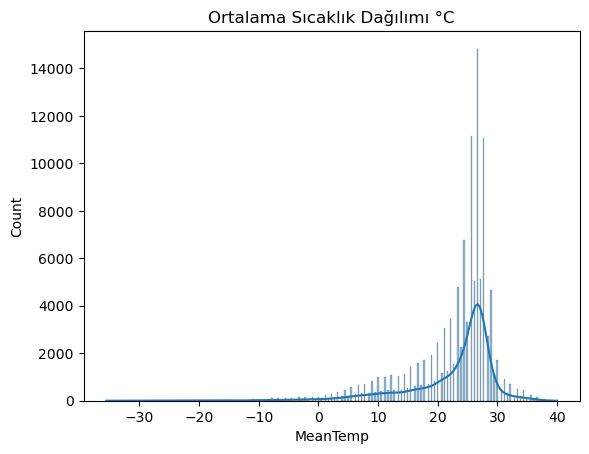

In [83]:
sns.histplot(df["MeanTemp"],kde=True)
plt.title("Ortalama Sıcaklık Dağılımı °C")
plt.show()

In [84]:
#*df['Date'] = pd.to_datetime(df[['Year','Month','Day']])

#plt.figure(figsize=(12,5))
#sns.lineplot(x='Date', y='MeanTemp', data=df)
#plt.title("Zaman Serisine Göre Ortalama Sıcaklık")
#plt.show()

In [85]:
df.head()

,Precip,MeanTemp,Snowfall,YR,MO,DA,PRCP,SNF,Day,Month,Year,Season_Spring,Season_Summer,Season_Winter
0,1.016,23.888889,0.0,42,7,1,0.04,0.0,1,7,1942,False,True,False
1,0.000,25.555556,0.0,42,7,2,0.00,0.0,2,7,1942,False,True,False
2,2.540,24.444444,0.0,42,7,3,0.10,0.0,3,7,1942,False,True,False
3,2.540,24.444444,0.0,42,7,4,0.10,0.0,4,7,1942,False,True,False
4,0.000,24.444444,0.0,42,7,5,0.00,0.0,5,7,1942,False,True,False


In [86]:
#df_ = df.drop("Date",axis=1)

In [87]:
df.corr()

,Precip,MeanTemp,Snowfall,YR,MO,DA,PRCP,SNF,Day,Month,Year,Season_Spring,Season_Summer,Season_Winter
Precip,1.000000,0.047047,-0.011129,0.009124,0.037847,0.000785,0.997984,-0.011119,0.000785,0.037847,0.009124,-0.021321,0.036696,-0.043391
MeanTemp,0.047047,1.000000,-0.356845,-0.015704,0.054590,-0.003020,0.046919,-0.356698,-0.003020,0.054590,-0.015704,0.000479,0.176661,-0.216418
Snowfall,-0.011129,-0.356845,1.000000,-0.001354,-0.044612,-0.000093,-0.011485,0.999997,-0.000093,-0.044612,-0.001354,0.031264,-0.054561,0.056420
YR,0.009124,-0.015704,-0.001354,1.000000,-0.141760,-0.010401,0.006099,-0.001337,-0.010401,-0.141760,1.000000,0.076617,0.007318,0.008561
MO,0.037847,0.054590,-0.044612,-0.141760,1.000000,0.006069,0.039241,-0.044583,0.006069,1.000000,-0.141760,-0.449366,0.050790,-0.185875
DA,0.000785,-0.003020,-0.000093,-0.010401,0.006069,1.000000,0.001180,-0.000105,1.000000,0.006069,-0.010401,0.009691,0.005545,-0.007934
PRCP,0.997984,0.046919,-0.011485,0.006099,0.039241,0.001180,1.000000,-0.011475,0.001180,0.039241,0.006099,-0.022183,0.036617,-0.044025
SNF,-0.011119,-0.356698,0.999997,-0.001337,-0.044583,-0.000105,-0.011475,1.000000,-0.000105,-0.044583,-0.001337,0.031220,-0.054538,0.056425
Day,0.000785,-0.003020,-0.000093,-0.010401,0.006069,1.000000,0.001180,-0.000105,1.000000,0.006069,-0.010401,0.009691,0.005545,-0.007934
Month,0.037847,0.054590,-0.044612,-0.141760,1.000000,0.006069,0.039241,-0.044583,0.006069,1.000000,-0.141760,-0.449366,0.050790,-0.185875


In [88]:
#sns.pairplot(df)
#plt.show()

In [89]:
# dependent & independent features
X = df.drop("MeanTemp",axis=1)
y = df["MeanTemp"]

In [90]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.25,random_state=15)

In [91]:
#sns.heatmap(df.corr())
#plt.show()

In [92]:
def correlation_for_dropping(df,treshold):
    columns_to_drop = set()
    corr = df.corr()
    for i in range(len(corr.columns)):
        for j in range(i):
            if abs(corr.iloc[i,j]) > treshold:
                columns_to_drop.add(corr.columns[i])
    return columns_to_drop

In [93]:
columns_dropping = correlation_for_dropping(X_train,0.95)

In [94]:
print(columns_dropping)

{'Day', 'SNF', 'Month', 'PRCP', 'Year'}


In [95]:
df.head()

,Precip,MeanTemp,Snowfall,YR,MO,DA,PRCP,SNF,Day,Month,Year,Season_Spring,Season_Summer,Season_Winter
0,1.016,23.888889,0.0,42,7,1,0.04,0.0,1,7,1942,False,True,False
1,0.000,25.555556,0.0,42,7,2,0.00,0.0,2,7,1942,False,True,False
2,2.540,24.444444,0.0,42,7,3,0.10,0.0,3,7,1942,False,True,False
3,2.540,24.444444,0.0,42,7,4,0.10,0.0,4,7,1942,False,True,False
4,0.000,24.444444,0.0,42,7,5,0.00,0.0,5,7,1942,False,True,False


In [96]:
X_train.drop(columns_dropping,axis=1,inplace=True)
X_test.drop(columns_dropping,axis=1,inplace=True)

In [97]:
X_train

,Precip,Snowfall,YR,MO,DA,Season_Spring,Season_Summer,Season_Winter
50928,4.826,0.0,45,4,22,True,False,False
93737,0.000,0.0,45,4,12,True,False,False
97389,0.000,0.0,45,12,14,False,False,True
54206,0.000,0.0,45,3,10,True,False,False
109980,18.542,0.0,44,5,1,True,False,False
...,...,...,...,...,...,...,...,...
50447,0.000,0.0,43,12,28,False,False,True
69682,0.000,0.0,45,6,30,False,True,False
8078,0.000,0.0,44,12,1,False,False,True
54415,8.382,0.0,45,10,5,False,False,False


In [98]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [99]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [100]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [102]:
y_train

50928     26.666667
93737     14.444444
97389      5.555556
54206     23.333333
109980    26.666667
            ...    
50447     26.666667
69682     31.111111
8078      28.333333
54415     23.888889
7626      28.888889
Name: MeanTemp, Length: 88044, dtype: float64

In [104]:
y_train.min()

-35.55555556

In [106]:
linear = LinearRegression()
linear.fit(X_train_scaled,y_train)
y_pred = linear.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("mae:",mae)
print("mse:",mse)
print("score:",score)

mae: 4.936457478023079
mse: 47.45680406610467
score: 0.16405725042513541


In [107]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(X_train_scaled,y_train)
y_pred = lasso.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("mae:",mae)
print("mse:",mse)
print("score:",score)

mae: 5.079395306275756
mse: 49.09976831822043
score: 0.13511674165312115


In [108]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(X_train_scaled,y_train)
y_pred = ridge.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("mae:",mae)
print("mse:",mse)
print("score:",score)

mae: 4.936458784134565
mse: 47.45677956202505
score: 0.164057682059926


In [109]:
from sklearn.linear_model import ElasticNet
elastic = ElasticNet()
elastic.fit(X_train_scaled,y_train)
y_pred = elastic.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("mae:",mae)
print("mse:",mse)
print("score:",score)

mae: 5.061340428078687
mse: 48.93375677153569
score: 0.1380410040750809
